In [2]:
import pandas as pd
from flask import Flask, request
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from pymongo import MongoClient

In [5]:
client = MongoClient("mongodb://localhost:27017")

In [6]:
df = pd.read_csv('Housesinfo.csv',sep=';')
df = df.to_dict(orient = 'records')

In [7]:
meu_banco = client['imobiliaria']
_ids = meu_banco.imoveis.insert_many(df)

In [8]:
mydb = client['imobiliaria']
mycol = mydb['imoveis']

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


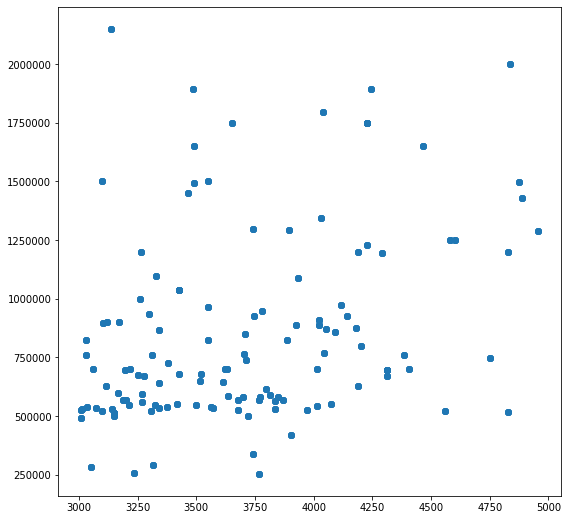

127.0.0.1 - - [27/Feb/2020 18:34:46] "GET /area/3000/5000 HTTP/1.1" 200 -


In [9]:
app = Flask(__name__)
@app.route("/area/<a>/<b>", methods =['GET'])
def area(a,b):
    query = {"area" : { "$gt" :  int(a), "$lt" : int(b)} }
    try:
        mydoc = mycol.find(query)
        df = pd.DataFrame((mydoc))
        #sns.scatterplot(x=df.area, y=df.preco)
        fig,axs = plt.subplots(1,1, figsize = (9,9))
        axs.scatter(df.area,df.preco)
        df =df.drop("_id", axis=1)
        plt.show()
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela casas.", 500
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


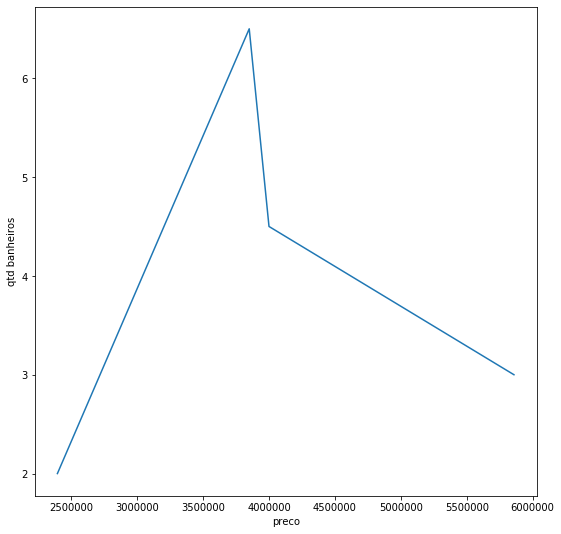

127.0.0.1 - - [27/Feb/2020 18:35:10] "GET /preco HTTP/1.1" 200 -


In [10]:
app = Flask(__name__)

@app.route("/preco", methods = ['GET']) #no get não precisa colocar o methods
def preco():

    try:
        mydoc = mycol.find()
        df = pd.DataFrame(mydoc).sort_values('preco',ascending = False).head(15)
        fig,axs = plt.subplots(1,1,figsize = (9,9))
        axs.plot(df.preco,df.qte_quartos)
        plt.xlabel('preco')
        plt.ylabel('qtd banheiros')
        plt.show()
        df =df.drop("_id", axis=1)
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela imoveis.", 500
app.run()

In [14]:
app = Flask(__name__)

@app.route("/banheiro/<qtd>", methods = ['GET']) #no get não precisa colocar o methods
def top_15(qtd):
    query = {"qte_banheiros :4"}
    try:
        mydoc = mycol.find(query)
        df = pd.read_sql(mydoc)
        fig,axs = plt.subplots(1,1,figsize = (9,9))
        axs.hist(df.qte_banheiros)
        plt.xlabel('banheiros')
        plt.ylabel('quartos')
        return df.to_json(orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela info_casas.", 500
app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [27/Feb/2020 18:41:19] "GET /banheiro/4 HTTP/1.1" 500 -


In [ ]:
app = Flask(__name__)

@app.route("/atualizar", methods=['PUT'])
def atualizar():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado no dado recebido.", 400
    
    if "qte_quartos" in post_args:
        query = "UPDATE info_casas SET qte_quartos = '{qte_quartos}' WHERE cep = '{cep}'".format(qte_quartos=post_args["qte_quartos"], cep=post_args["cep"])
        cur.execute(query)
    if "qte_banheiros" in post_args:
        query = "UPDATE info_casas SET qte_banheiros = '{qte_banheiros}' WHERE cep = '{cep}'".format(qte_banheiros=post_args["qte_banheiros"], cep =post_args["qte_banheiros"])
        cur.execute(query)
    if "area" in post_args:
        query = "UPDATE info_casas SET area = '{area}' WHERE cep = '{cep}'".format(area=post_args["area"], cep=post_args["cep"])
        cur.execute(query)
    if "preco" in post_args:
        query = "UPDATE info_casas SET preco = '{preco}' WHERE cep = '{cep}'".format(preco=post_args["preco"], cep=post_args["cep"])
        cur.execute(query)
    con.commit()
    return "Imovel atualizado com sucesso!", 200
app.run()


In [ ]:
app = Flask(__name__)

@app.route("/deletar_endereco", methods=['DELETE'])
def deletar_imovel():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado no dado recebido.", 400
    
    query = "DELETE FROM info_casas WHERE cep = {cep};".format(cep=post_args["cep"])
    cur.execute(query)
    con.commit()
    return "Imovel deletada com sucesso!", 200

app.run()

In [ ]:
mydb = client['imobiliaria']
mycol = mydb['imoveis']
myquery = {'area': {'$gt': 2000}}
mydoc = mycol.find(myquery)

df = pd.DataFrame(myquery)
df

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df[df['area']>=2000]